# Machine Learning, Exercise set #3

## Inference for a difference in proportions

Recall the story from the lecture: "Two sellers at Amazon have the same price. One has 90 positive and 10 negative reviews. The other one 2 positive and 0 negative.  Who should you buy from?"

Posteriors about reliability:
$$\begin{aligned}
p(\theta_1\,|\,\mathcal{D}_1) & = \text{Beta}(\theta_1\,|\,91,11) \\
p(\theta_2\,|\,\mathcal{D}_1) & = \text{Beta}(\theta_2\,|\,3,1)
\end{aligned}$$

Probability that seller 1 is more reliable than seller 2:

$$p(\theta_1>\theta_2\,|\,\mathcal{D}_1,\mathcal{D}_2) = \int_0^1\int_0^1 [\theta_1>\theta_2]\ \text{Beta}(\theta_1\,|\,91,11)\ \text{Beta}(\theta_2\,|\,3,1)\ d\theta_1 d\theta_2$$

In [2]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import dblquad, nquad
import matplotlib.pyplot as plt

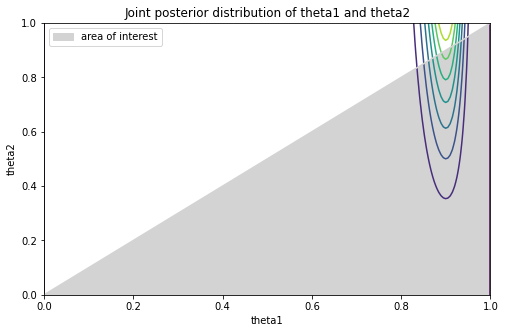

In [45]:
plt.figure(figsize=(8,5))

def fun(t1, t2):
    return beta.pdf(t1, 91, 11)*beta.pdf(t2, 3, 1)

# plot over [0,1] x [0,1]
x = y = np.linspace(1e-19, 1-1e-19, 200)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

plt.plot(x, x, color='lightgray')
plt.fill_between(x, x, color='lightgray', label='area of interest')
plt.contour(X, Y, Z)
plt.legend()
plt.title('Joint posterior distribution of theta1 and theta2')
plt.ylabel('theta2')
plt.xlabel('theta1');

### Exact numerical integration

In [91]:
# define the integrand
def f(theta1, theta2):
    return (theta1 > theta2) * beta.pdf(theta1, 91, 11) * beta.pdf(theta2, 3, 1)

p, err = dblquad(f, 0, 1, 0, 1, epsabs=0.001) 
# set epsabs=0.001 to abort computation if the error is smaller than 0.001
# the discontiunity at theta1=theta2 causes some problems

print('Result:', p)
print('Error:', err)

Result: 0.7125879699284219
Error: 0.0009160577354114059


#### Rewrite the integral for faster computation:

$$p(\theta_1>\theta_2\,|\,\mathcal{D}_1,\mathcal{D}_2) = \int_0^1\int_{\theta_2}^1 \text{Beta}(\theta_1\,|\,91,11)\ \text{Beta}(\theta_2\,|\,3,1)\ d\theta_1d\theta_2$$

In [52]:
# define the integrand
def g(theta1, theta2):
    return beta.pdf(theta1, 91, 11) * beta.pdf(theta2, 3, 1)

p, err = dblquad(g, 0., 1., lambda theta2: theta2, lambda theta2: 1.)
print('Result:', p)
print('Error:', err)

Result: 0.7125928041119366
Error: 1.8296501031259127e-08


### Monte Carlo Integration
- Generate $n$ realizations from the joint posterior of $\theta_1$ and $\theta_2$ 
- Calculate frequency of $\theta_1$ being greater than $\theta_2$

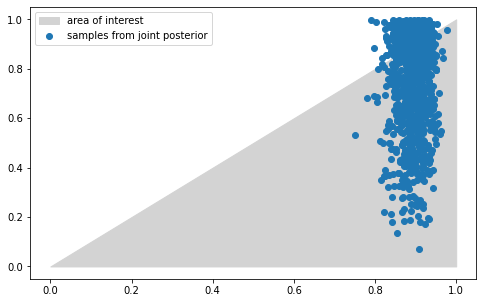

In [86]:
n = 1000
samples_theta1 = beta.rvs(91, 11, size=n)
samples_theta2 = beta.rvs(3, 1, size=n)

x = y = np.linspace(1e-19, 1-1e-19, 200)
plt.figure(figsize=(8,5))
plt.fill_between(x, x, color='lightgray', label='area of interest')
plt.scatter(samples_theta1, samples_theta2, label='samples from joint posterior')
plt.legend();

In [90]:
# calculate the relative frequency of a sample laying in the gray triangle
p = np.sum(samples_theta1 > samples_theta2) / n
print(p) # only a rough estimate of the integral

0.7172
